## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [82]:
# Nothing to do here

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [84]:
# Import modules
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [86]:
# How many distinct colors are available?
unique_colors  = colors.name.unique()
unique_colors

array(['Unknown', 'Black', 'Blue', 'Green', 'Dark Turquoise', 'Red',
       'Dark Pink', 'Brown', 'Light Gray', 'Dark Gray', 'Light Blue',
       'Bright Green', 'Light Turquoise', 'Salmon', 'Pink', 'Yellow',
       'White', 'Light Green', 'Light Yellow', 'Tan', 'Light Violet',
       'Glow In Dark Opaque', 'Purple', 'Dark Blue-Violet', 'Orange',
       'Magenta', 'Lime', 'Dark Tan', 'Bright Pink', 'Medium Lavender',
       'Lavender', 'Trans-Black IR Lens', 'Trans-Dark Blue',
       'Trans-Green', 'Trans-Bright Green', 'Trans-Red', 'Trans-Black',
       'Trans-Light Blue', 'Trans-Neon Green', 'Trans-Very Lt Blue',
       'Trans-Dark Pink', 'Trans-Yellow', 'Trans-Clear', 'Trans-Purple',
       'Trans-Neon Yellow', 'Trans-Neon Orange', 'Chrome Antique Brass',
       'Chrome Blue', 'Chrome Green', 'Chrome Pink', 'Chrome Black',
       'Very Light Orange', 'Light Purple', 'Reddish Brown',
       'Light Bluish Gray', 'Dark Bluish Gray', 'Medium Blue',
       'Medium Green', 'Speckle Black-

In [87]:
type(unique_colors)

numpy.ndarray

In [88]:
# convert numpy array to list
unique_colors_list = unique_colors.tolist()
type(unique_colors_list)

list

Now as we have list we can apply len function to get count of unique colors in list.

In [89]:
num_colors = len(unique_colors_list)
num_colors

135

## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [91]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby(colors['is_trans']).count()

print(colors_summary)


           id  name  rgb
is_trans                
f         107   107  107
t          28    28   28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

In [93]:
sets = pd.read_csv('datasets/sets.csv')
sets.head(2)

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12


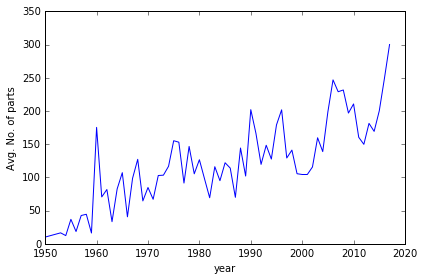

In [94]:
# Create a summary of average number of parts by year: `parts_by_year`
# Plot trends in average number of parts by year
import matplotlib.pyplot as plt, pylab

% matplotlib inline
parts_by_year = sets[['year', 'num_parts']].groupby(sets['year'], as_index = False).mean()
# parts_by_year.plot(x = 'year', y = 'num_parts')
# plt.show()
plt.plot(parts_by_year['year'],parts_by_year['num_parts'])
pylab.xlabel ('year')
pylab.ylabel('Avg. No. of parts')
plt.show()



## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [102]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets.groupby(["year"]).apply(lambda x: x["theme_id"].nunique())
themes_by_year = themes_by_year.to_frame().reset_index()
themes_by_year = themes_by_year.rename(columns = {0: "theme_id"})

AttributeError: Cannot access attribute 'shape' of 'DataFrameGroupBy' objects, try using the 'apply' method

## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>